# Detection of Malicicous Data

## Part I: Preprocessing 

### Read the data.file
The data file includes dataset structured like Basic Safety Messages (BSM) defined in the SEA J2735 standard, including vehicle's location, speed, acceleration, heading, and brake status. We utilize the data to check the correcteness of the data and better classify the five types of position spoofing attack. 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### colunm data
1. Type (3=BSM)
2. Time BSM was received by the receiver
3. Receiver ID
4. Receiver X position
5. Receiver Y position
6. Receiver Z position
7. Time BSM was transmitted
8. Transmitter ID
9. BSM ID
10. Transmitter X position
11. Transmitter Y position
12. Transmitter Z position
13. Transmitter X velocity
14. Transmitter Y velocity
15. Transmitter Z velocity
16. RSSI (Received Signal Strength Indicator)
17. Label (0=Normal Behavior)

In [3]:
cols = [2,3,4,9,10,15,16] #id, xr ,yr, xt, yt, RSSI, label.
data = pd.read_csv("dataset/attack1withlabels.csv",usecols=cols)
data = data.dropna(axis=0, how="any")#remove invalid data
data_id = data.iloc[:,0]
# attack 1: distance is too far recevier and transmitter
pos_xr = data.iloc[:,1]
pos_yr = data.iloc[:,2]
pos_xt = data.iloc[:,3]
pos_yt = data.iloc[:,4]
rssi   = data.iloc[:,5]
label = data.iloc[:,6]


In [4]:
# We read the data from the dataset.
data = pd.read_csv("dataset/attack1withlabels.csv", usecols=cols, header=None)
X = data.iloc[:,:6]
y = data.iloc[:,6]

Two observations for attack 1
* The fake distance exceed the upper bound of communication range which is 800m
* The distance does not change but the RSSI changes.
The first criteria is trivial, thus we apply a filter. 

In [5]:
#add a distance feature
def distance(X):
    distance = np.zeros(len(X))
    for i in range(len(X)):
        distance[i] = np.linalg.norm([X.iloc[i][3]-X.iloc[i][9], X.iloc[i][4]-X.iloc[i][10]])
    distance_series = pd.Series(distance)
    return distance_series

distance_series = distance(X)
X['distance'] = distance_series

In [36]:
# We filter the BSM whose distance is above the thredhold = 800
def filtering_dis(X,y,thredhold):
    drop_index = np.zeros(len(y))
    for i in range(len(y)):
        if X['distance'][i] > thredhold:
            drop_index[i]=1
    return drop_index
drop_index = filtering_dis(X,y,800)
drop_index_ = np.where(drop_index>0)
np.asarray(drop_index_)[0]
X_filter = X.drop(np.asarray(drop_index_)[0])
y_filter = y.drop(np.asarray(drop_index_)[0])

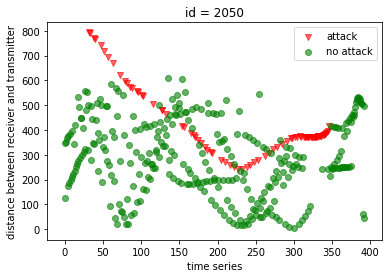

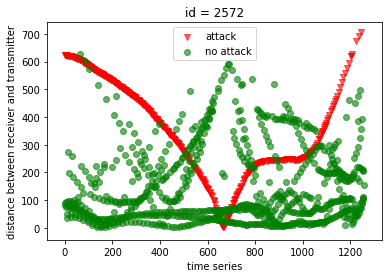

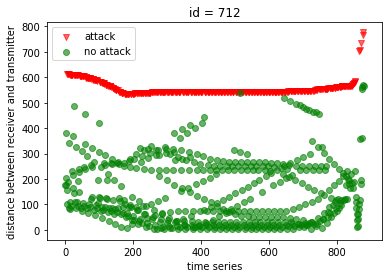

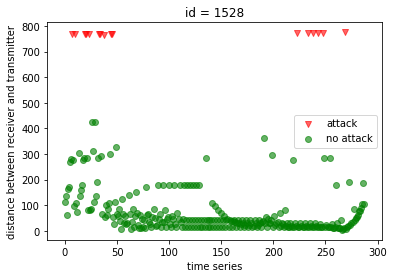

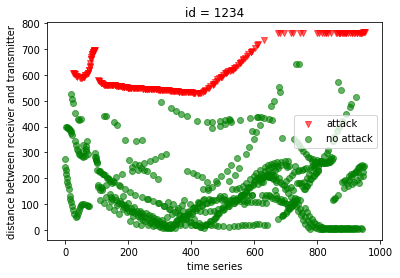

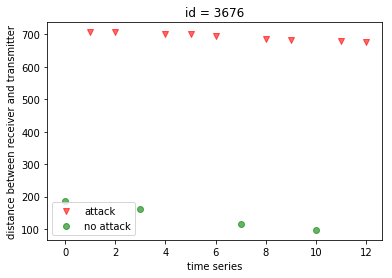

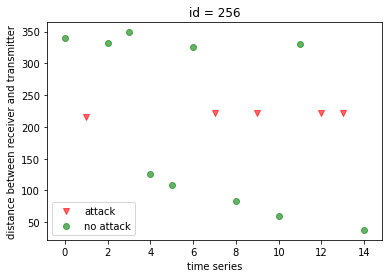

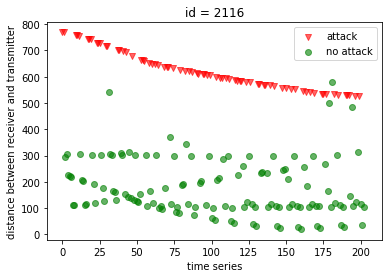

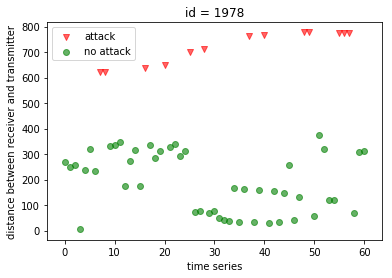

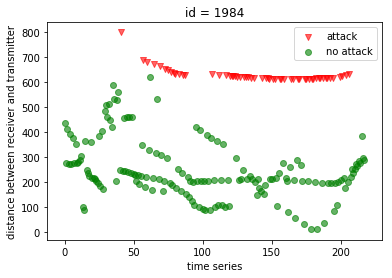

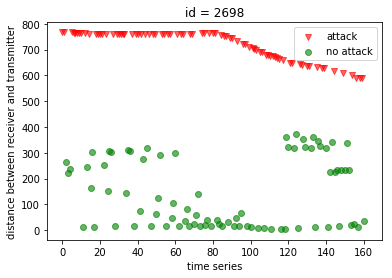

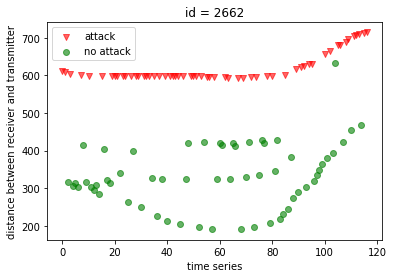

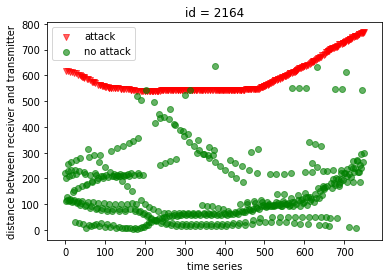

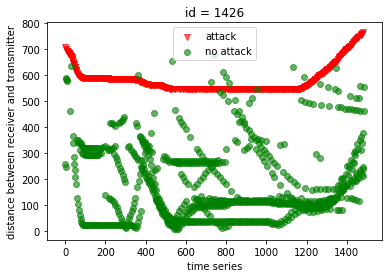

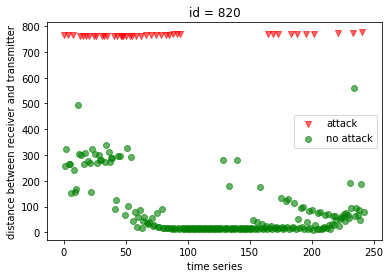

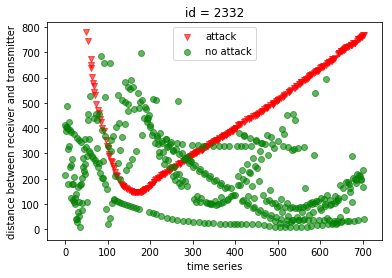

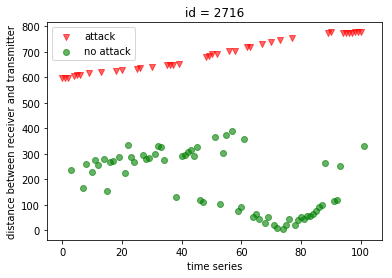

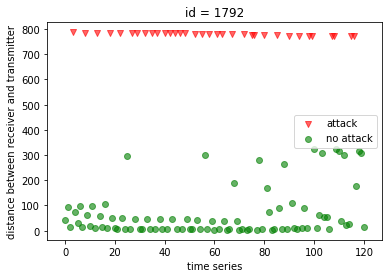

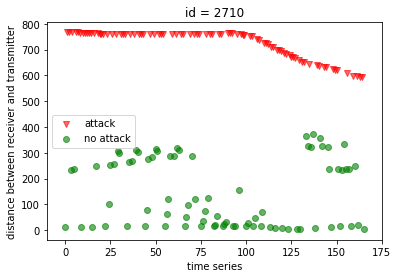

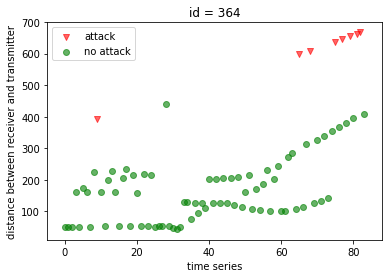

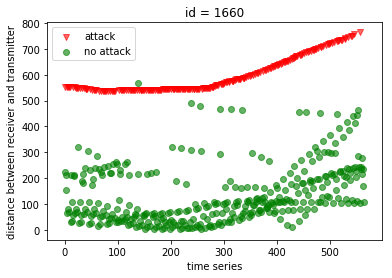

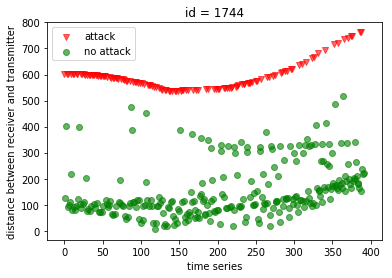

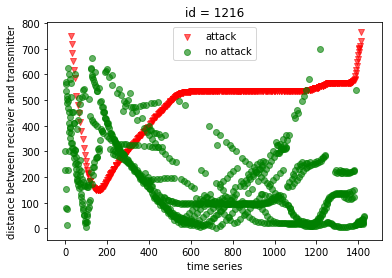

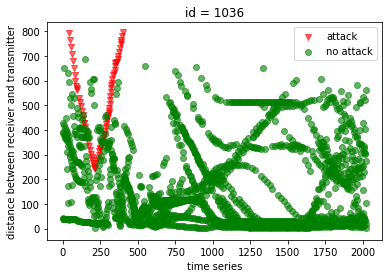

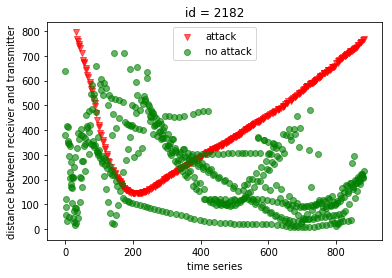

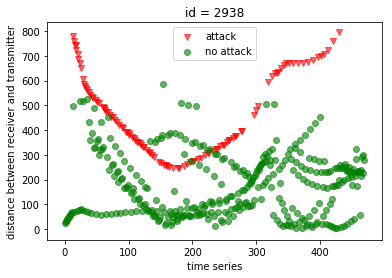

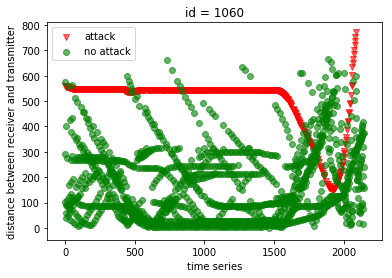

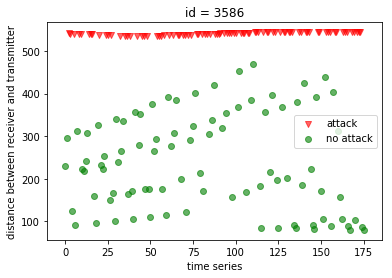

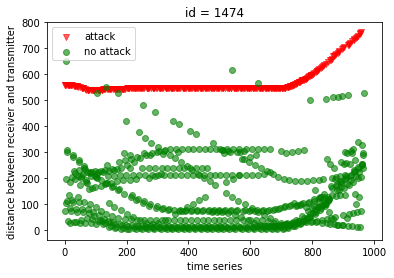

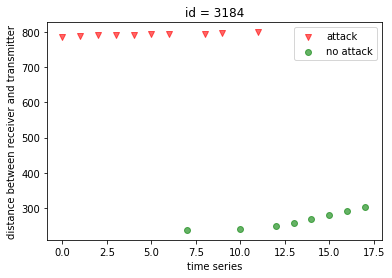

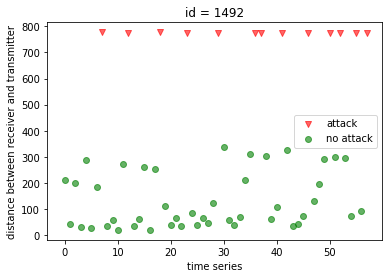

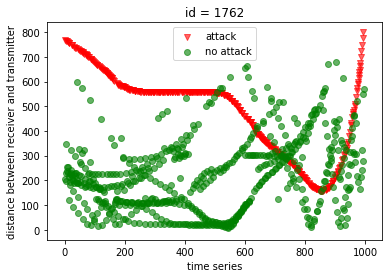

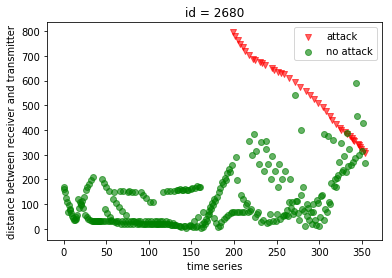

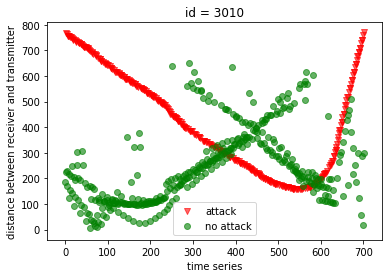

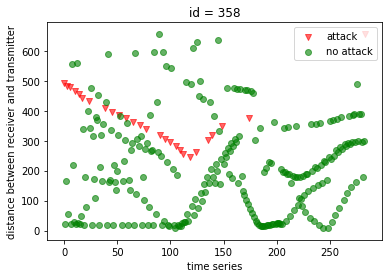

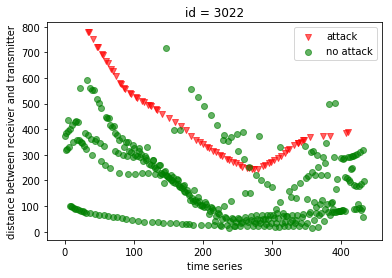

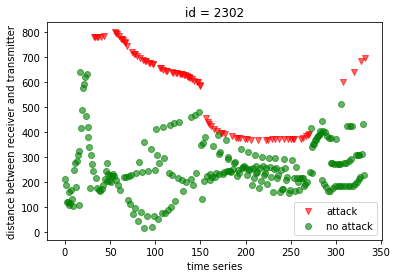

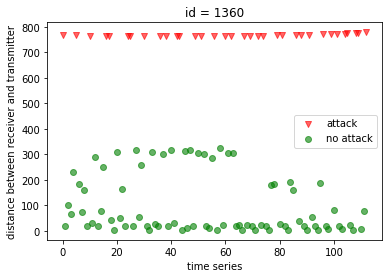

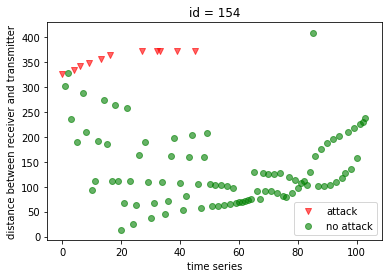

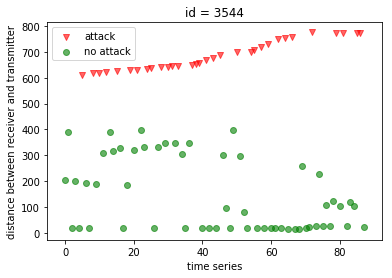

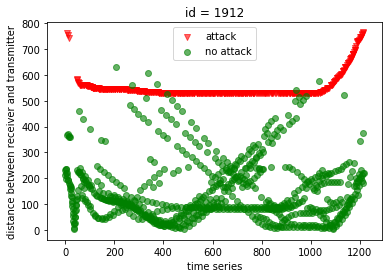

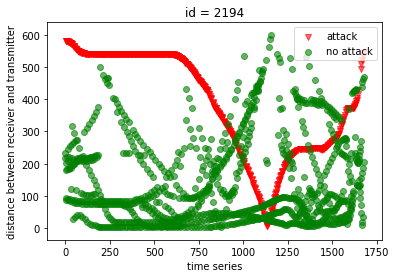

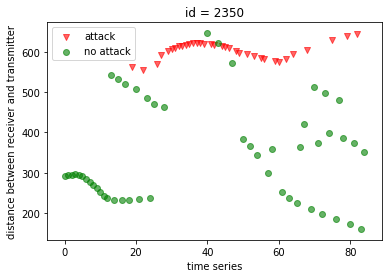

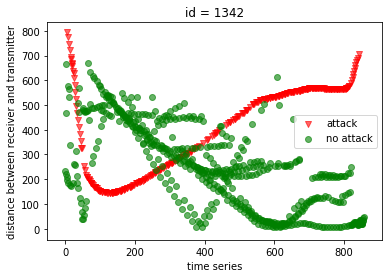

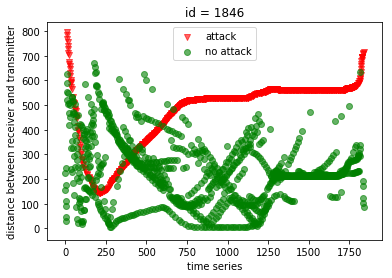

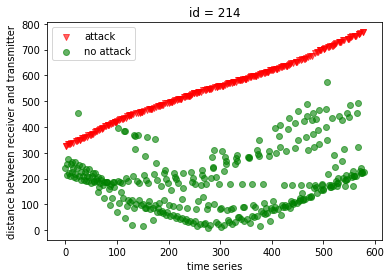

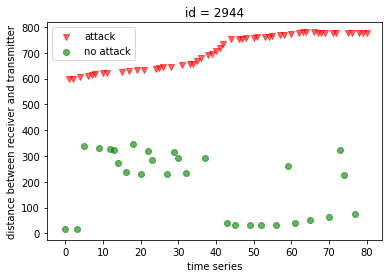

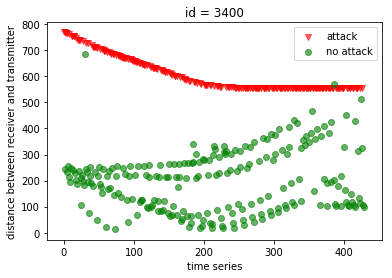

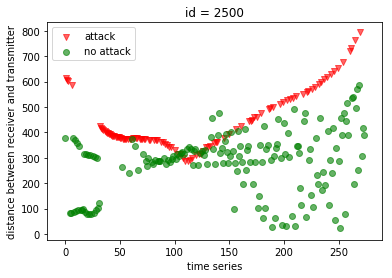

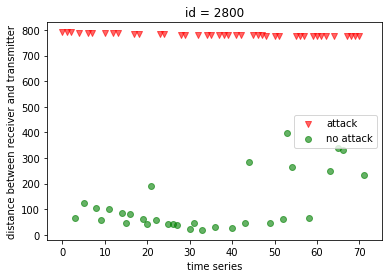

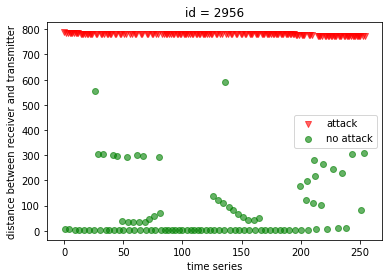

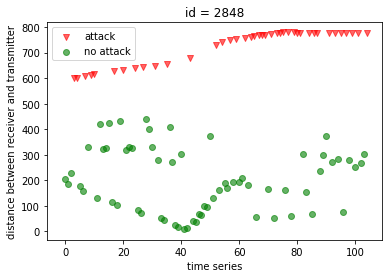

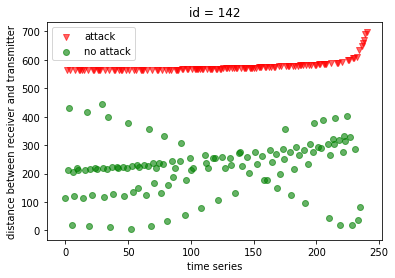

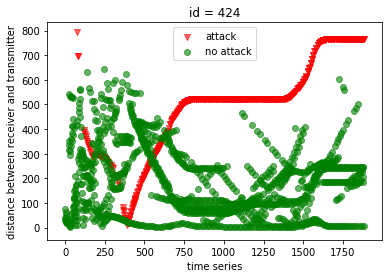

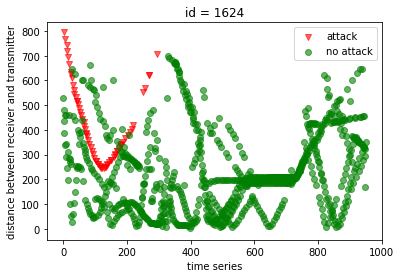

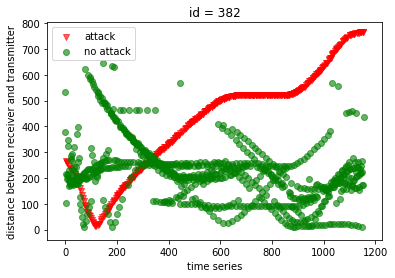

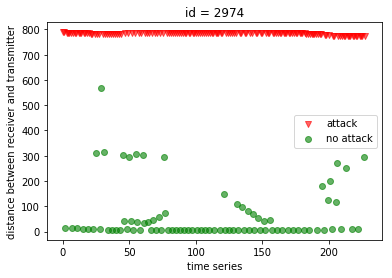

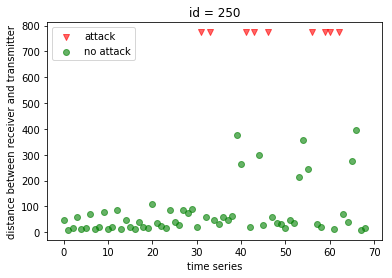

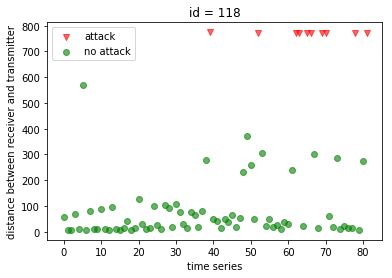

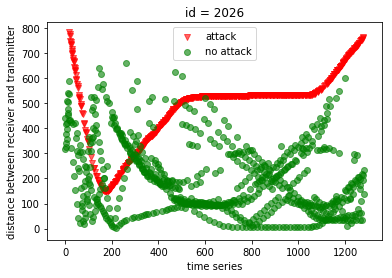

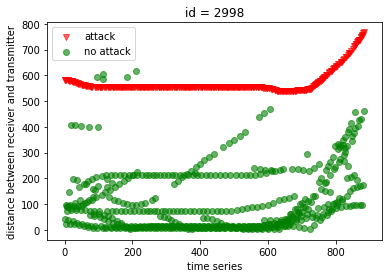

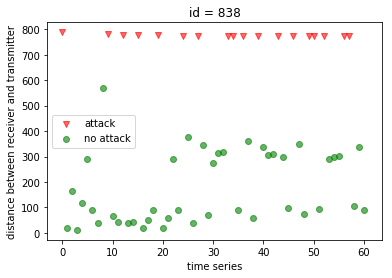

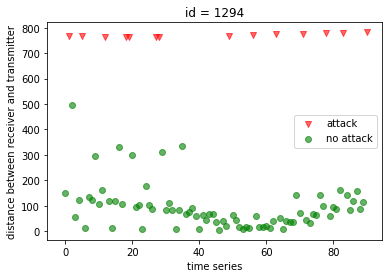

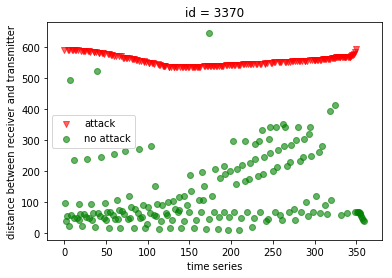

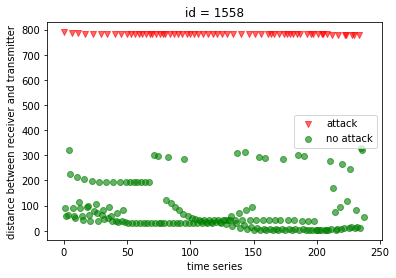

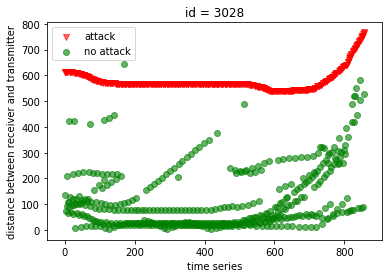

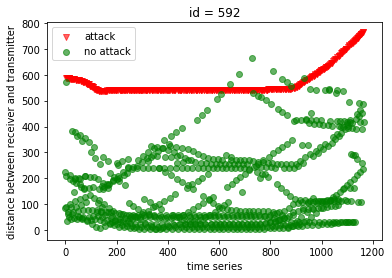

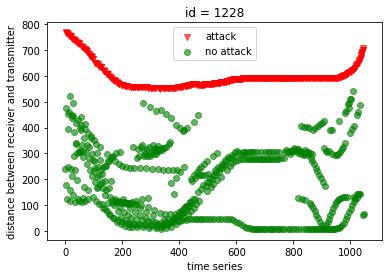

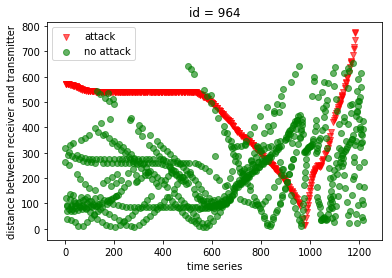

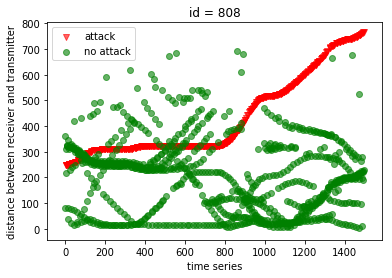

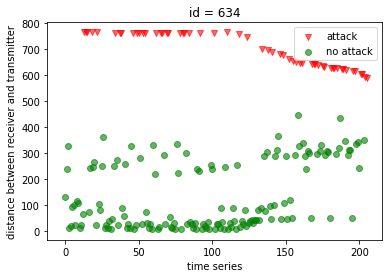

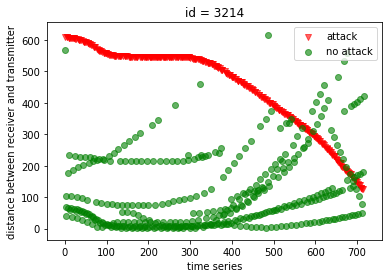

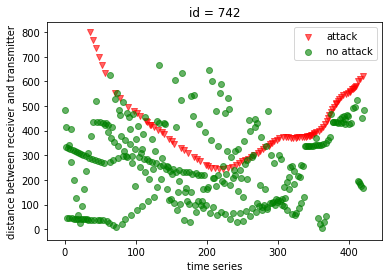

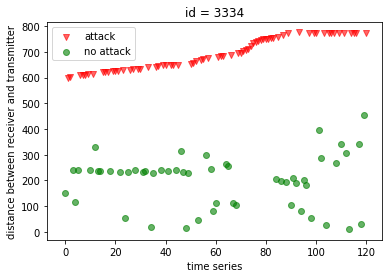

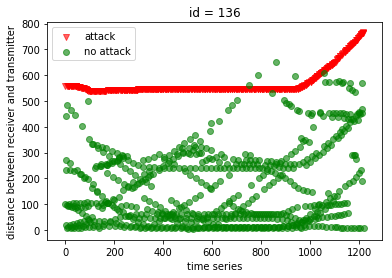

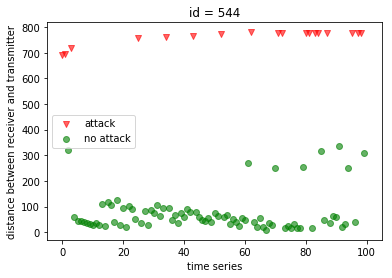

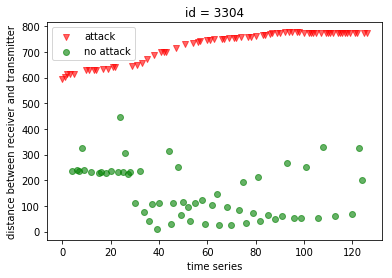

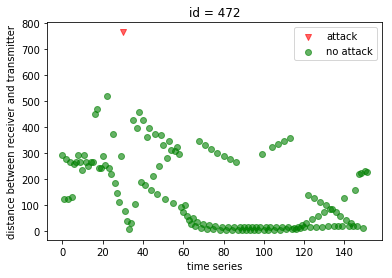

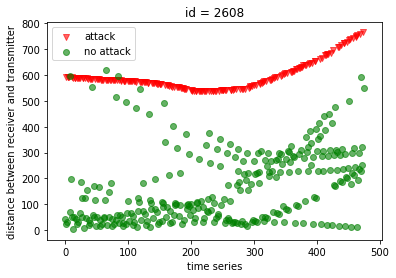

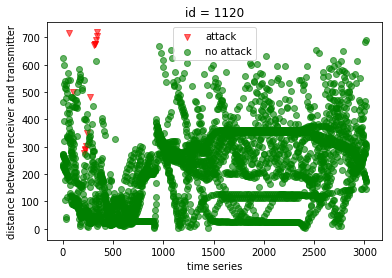

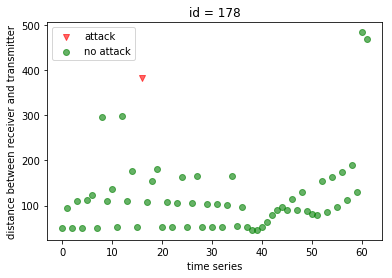

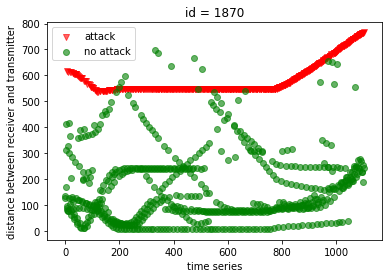

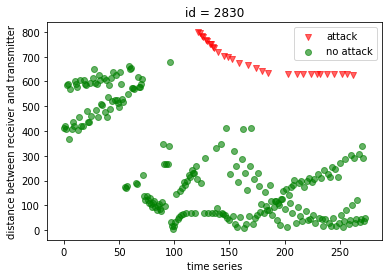

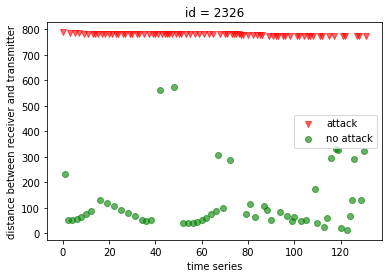

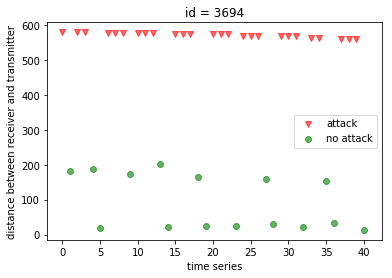

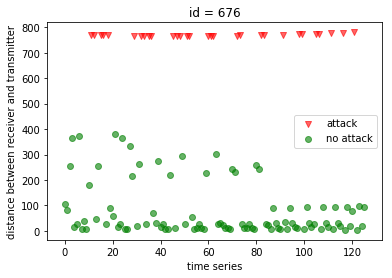

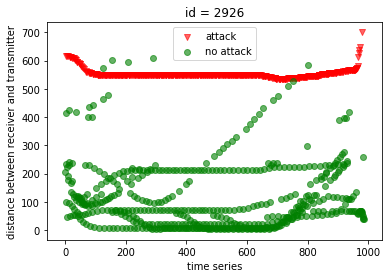

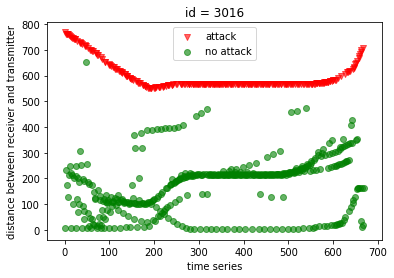

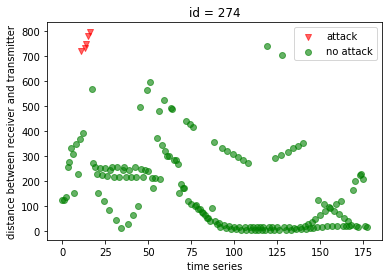

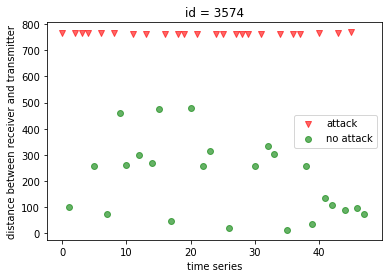

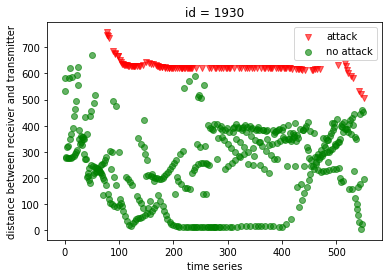

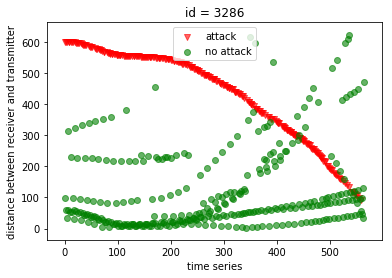

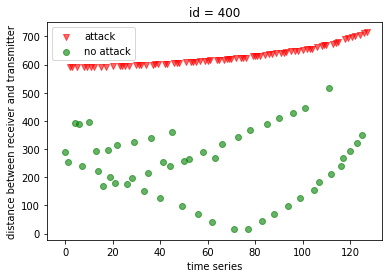

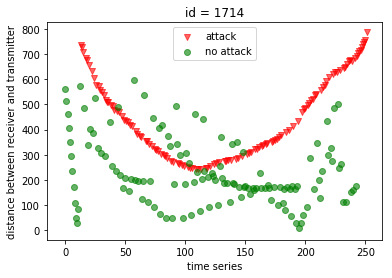

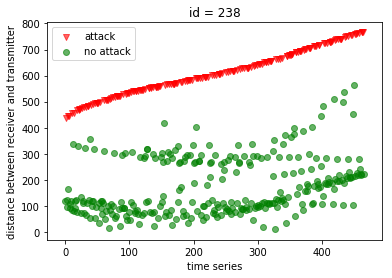

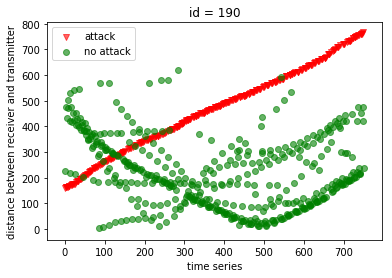

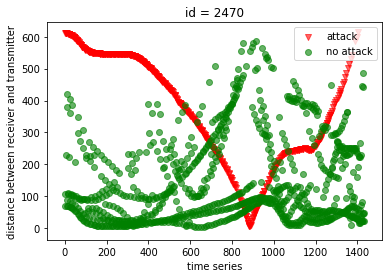

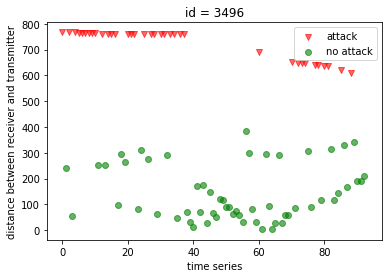

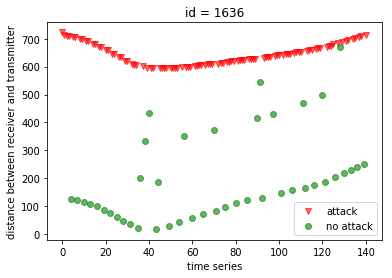

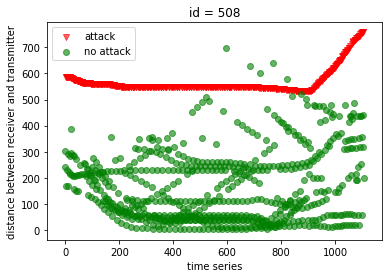

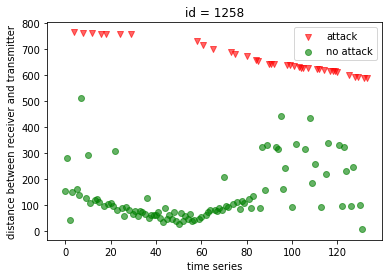

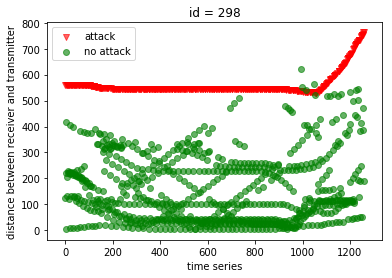

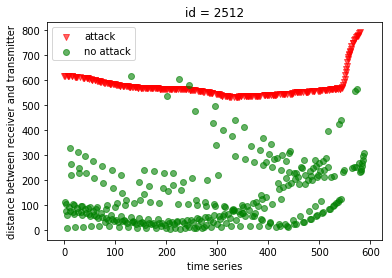

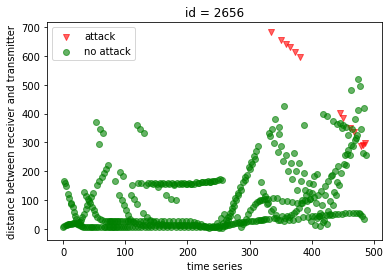

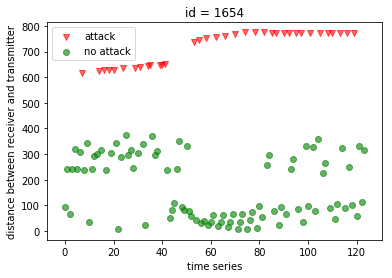

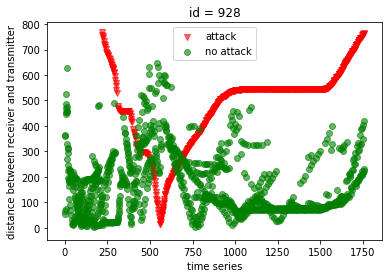

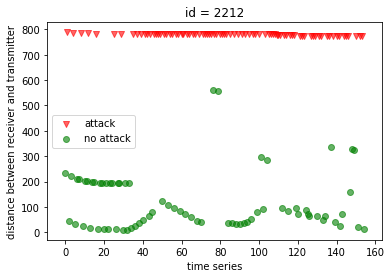

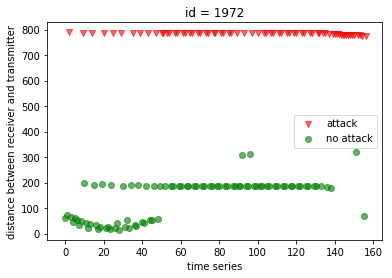

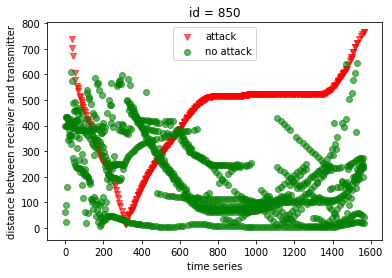

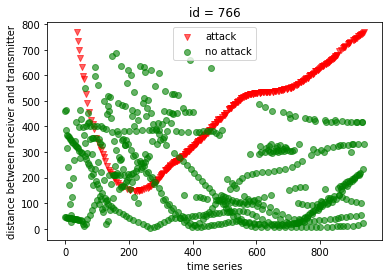

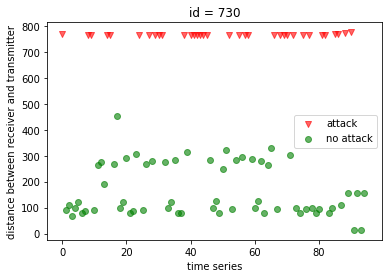

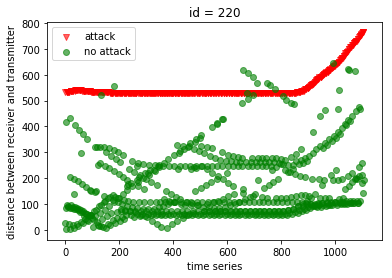

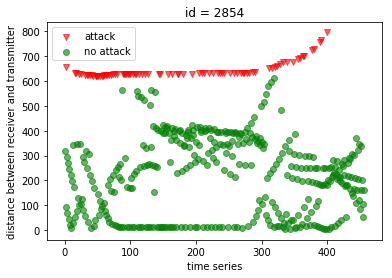

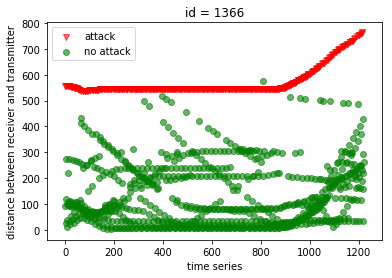

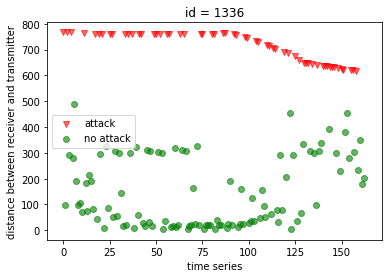

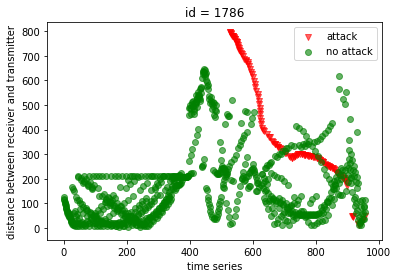

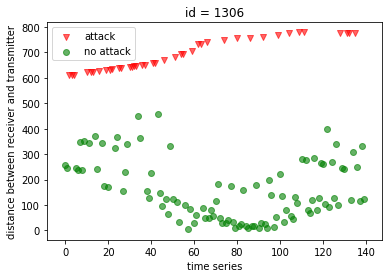

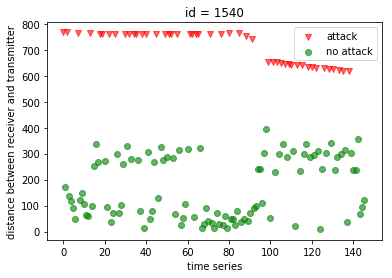

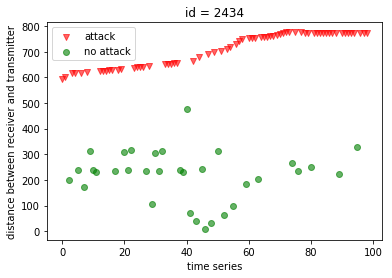

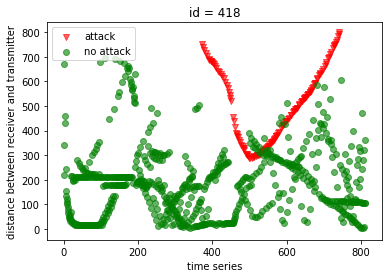

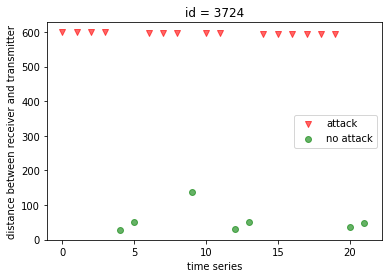

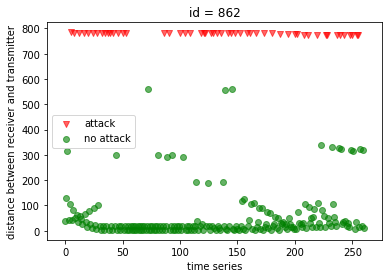

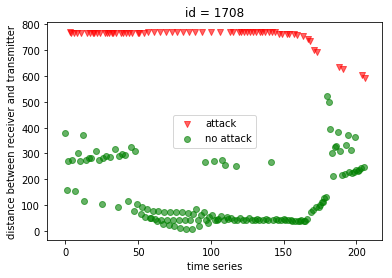

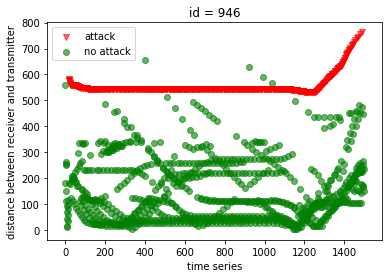

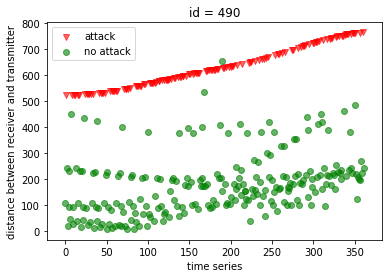

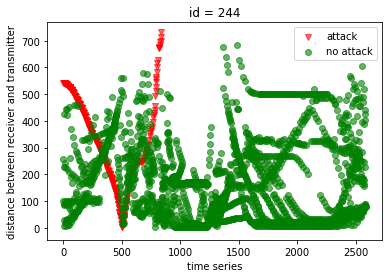

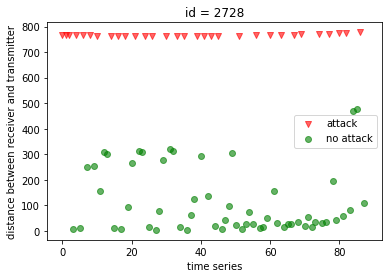

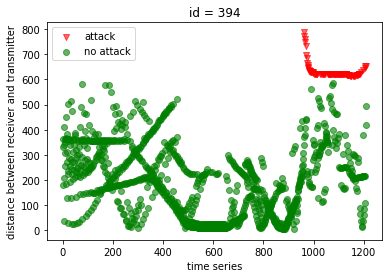

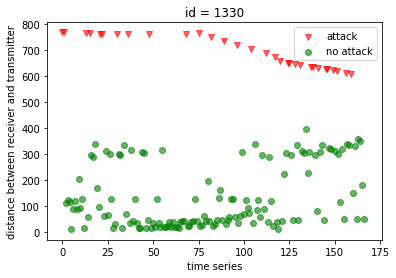

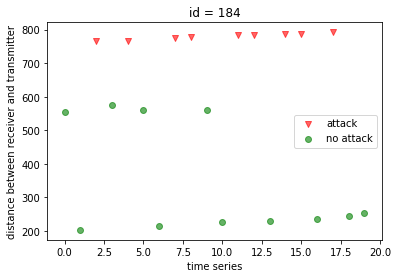

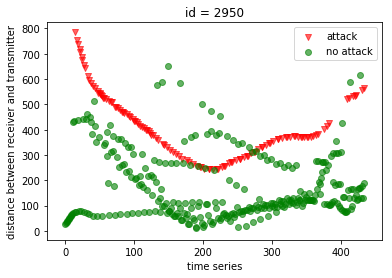

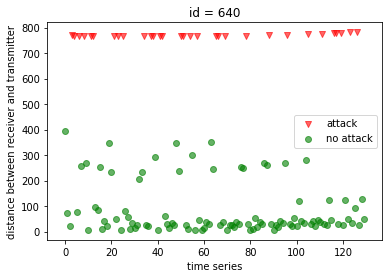

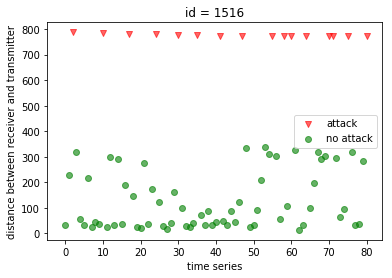

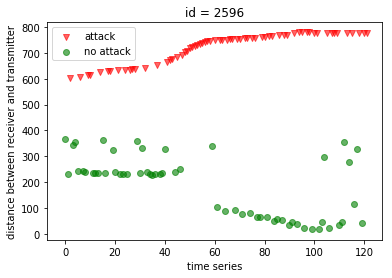

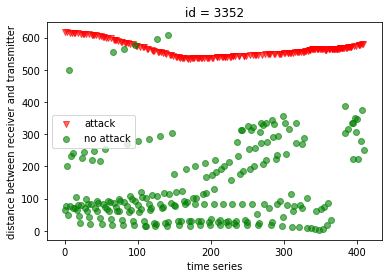

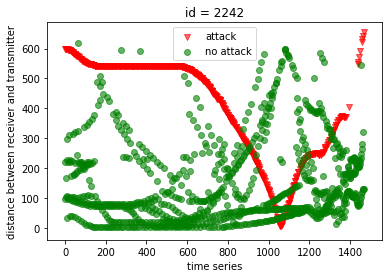

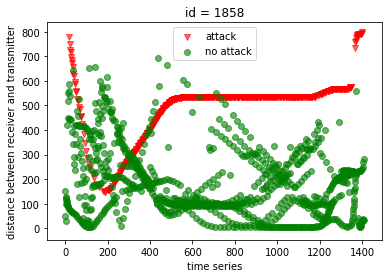

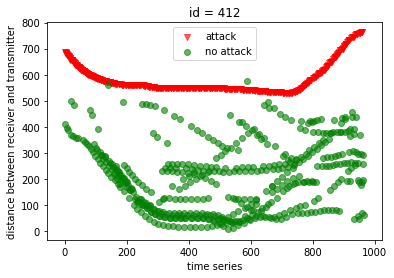

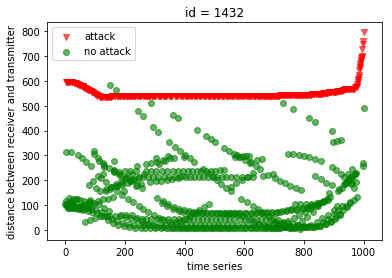

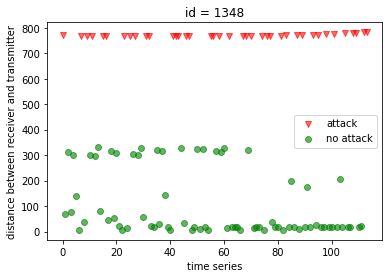

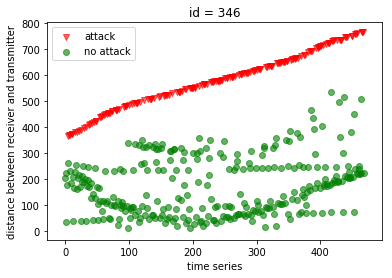

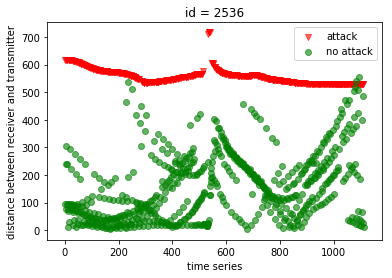

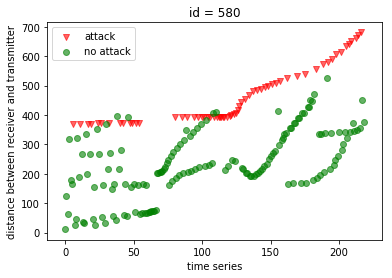

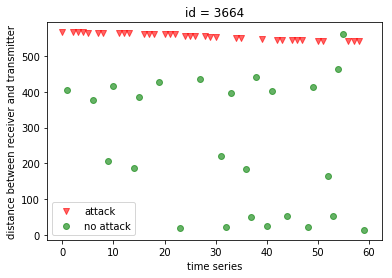

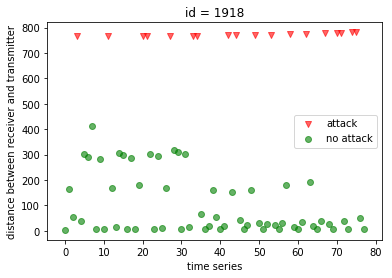

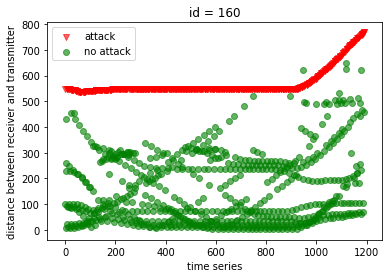

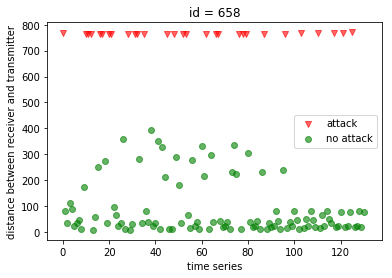

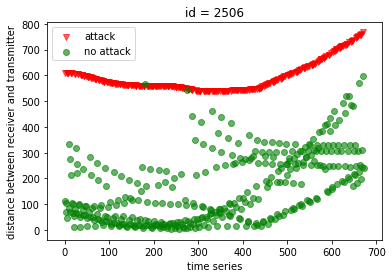

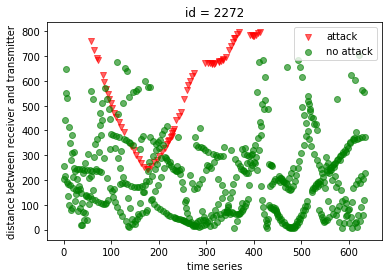

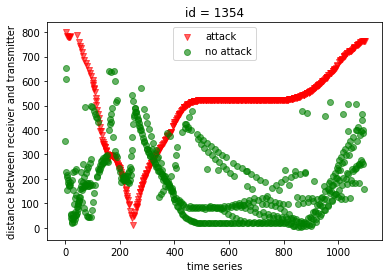

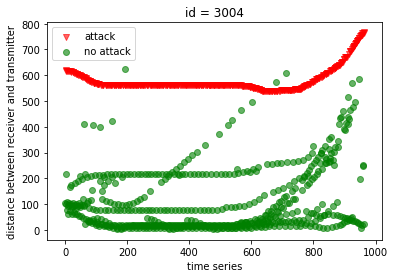

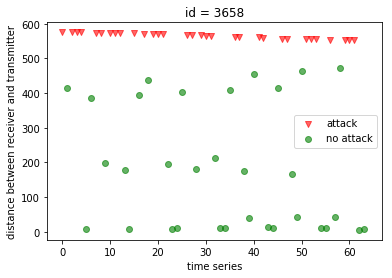

In [41]:
#display figure of distance and attack(no attack)
def cal_dis(x1,y1,x2,y2):
    return np.linalg.norm([x1-x2, y1-y2])
def display_dist_attack(data_frame_X, data_frame_y):
    #display the feature
    data_id=data_frame_X[2]
    pos_xr = data_frame_X[3].values
    pos_yr = data_frame_X[4].values
    pos_xt = data_frame_X[9].values
    pos_yt = data_frame_X[10].values
    label  = data_frame_y.values
    index = 0
    for i in range(400): # for example , we take the case of id 0-40
        x=[]
        y=[]
        attack = []
        no_attack =[]
        a = data_id.values[index]
        count = data_id.value_counts()[a]
        tm = np.arange(0,count)
        for j in range(count):
            dis = cal_dis(pos_xr[j+index],pos_yr[j+index],pos_xt[j+index],pos_yt[j+index])
            if(label[j+index]==1):
                attack.append([j,dis])
            else:
                no_attack.append([j,dis])
        #transpose
        attack_l = []
        no_attack_l =[]
        for row in attack :
            attack_l= [[attack[j][i] for j in range(len(attack))] for i in range(len(attack[0]))]
        for row in no_attack:
            no_attack_l = [[no_attack[j][i] for j in range(len(no_attack))] for i in range(len(no_attack[0]))]

        index = index + count
        
        if(len(attack_l)!=0):
            fig = plt.figure(i)
            if(len(attack_l)==0):
                attack_l=[]
            else:
                plt.scatter(attack_l[0],attack_l[1],c='red',marker='v',alpha=0.6,label='attack')
            if(len(no_attack_l)==0):
                no_attack_l=[]
            else:
                plt.scatter(no_attack_l[0],no_attack_l[1],c="green",alpha=0.6,label="no attack")

            plt.xlabel("time series")
            plt.ylabel("distance between receiver and transmitter")
            plt.legend(loc="best")
            plt.title("id = "+str(a))
            plt.show()
display_dist_attack(X_filter,y_filter)

In [34]:
def drop_no_attack(data_frame_X, data_frame_y):
    #display the feature
    data_id= data_frame_X[2]
    pos_xr = data_frame_X[3].values
    pos_yr = data_frame_X[4].values
    pos_xt = data_frame_X[9].values
    pos_yt = data_frame_X[10].values
    label  = data_frame_y.values
    index = 0
    for i in range(400): # for example , we take the case of id 0-40
        x=[]
        y=[]
        attack = []
        no_attack =[]
        a = data_id.values[index]
        count = data_id.value_counts()[a]
        tm = np.arange(0,count)
        for j in range(count):
            dis = cal_dis(pos_xr[j+index],pos_yr[j+index],pos_xt[j+index],pos_yt[j+index])
            if(label[j+index]==1):
                attack.append([j,dis])
            else:
                no_attack.append([j,dis])
        #transpose
        attack_l = []
        no_attack_l =[]
        for row in attack :
            attack_l= [[attack[j][i] for j in range(len(attack))] for i in range(len(attack[0]))]
        for row in no_attack:
            no_attack_l = [[no_attack[j][i] for j in range(len(no_attack))] for i in range(len(no_attack[0]))]

        index = index + count
        
        if(len(attack_l)!=0):
            fig = plt.figure(i)
            if(len(attack_l)==0):
                attack_l=[]
            else:
                plt.scatter(attack_l[0],attack_l[1],c='red',marker='v',alpha=0.6,label='attack')
            if(len(no_attack_l)==0):
                no_attack_l=[]
            else:
                plt.scatter(no_attack_l[0],no_attack_l[1],c="green",alpha=0.6,label="no attack")

            plt.xlabel("time series")
            plt.ylabel("distance between receiver and transmitter")
            plt.legend(loc="best")
            plt.title("id = "+str(a))
            plt.show()

In [ ]:
#drop receiver colums 
X_feed = X_filter.drop([3, 4], axis = 1)
X_feed = drop_no_attack_id()

In [8]:
# split training data and validate data
data_count = y_feed.count()
data_rate = 0.8 * data_count
data_rate = int(data_rate)
X_train = X_feed.iloc[:data_rate,:]
y_train = y_filter.iloc[:data_rate]
X_test = X_feed.iloc[data_rate:,:]
y_test = y_filter.iloc[data_rate:]

X_train.shape

(266402, 5)

After pre-processing, we get the following relevant information:
1. The ID of the transmitter BSM (Coloum 2)
2. Transmitter positions (Coloum 9,10)
3. The distance between transmitter and receiver (Coloum 'distance')
4. The RSSI (Coloum 16)
We feed the following information into the training model.

## impletation keras

In [73]:
from tensorflow.python.keras import backend as k
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.recurrent import LSTM
import tensorflow
from sklearn import model_selection


In [74]:
# model implementation
model = Sequential()
model.add(LSTM(32, input_shape=(None,5),return_sequences=False))
model.add(Dense(8, input_dim=5))
model.add(Dense(1, activation="relu"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
print("The radio of 0/all = ",1-sum(y_filter)/y_filter.shape[0])
X_train.shape

The radio of 0/all =  0.8671063023456245


(266402, 1, 5)

In our dataset, attack take the part of 13.3% and normal take a part of 86.7% 

In [1]:
#to satisfait LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], 1,X_train.shape[1]))
X_test =np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

NameError: name 'np' is not defined

In [ ]:
#fit data
model.fit(X_train,y_train,epochs=10,batch_size=100)

In [125]:
cost = model.evaluate(X_test.values,y_test.values,batch_size=100)
print('loss \n',cost[0])
print('accurency \n',cost[1])

66601/66601 [==============================] - 1s 8us/step
loss 
 1.8329824162138717
accurency 
 0.8862779837549901
